In [1]:
%pylab inline
from astropy.io import fits
from astropy.table import Table
from simqso.sqrun import buildWaveGrid,load_spectra
from simqso import hiforest
from simqso.sqmodels import WP11_model
import bossqsos

Populating the interactive namespace from numpy and matplotlib


### Input luminosity function

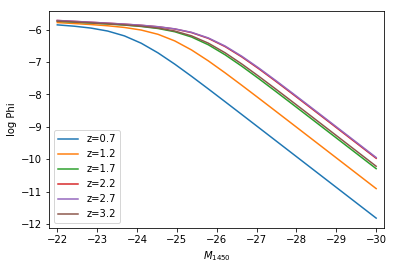

In [2]:
M1450 = linspace(-30,-22,20)
zz = arange(0.7,3.5,0.5)
ple = bossqsos.BOSS_DR9_PLE()
lede = bossqsos.BOSS_DR9_LEDE()
for z in zz:
    if z<2.2:
        qlf = ple if z<2.2 else lede
    plot(M1450,qlf(M1450,z),label='z=%.1f'%z)
legend(loc='lower left')
xlim(-21.8,-30.2)
xlabel("$M_{1450}$")
ylabel("log Phi")

### Run the simulation, save the spectra

In [3]:
_ = bossqsos.qsoSimulation(bossqsos.simParams,saveSpectra=True)

boss_dr9qlf_sim output not found
generating QSO grid
integration returned  417  objects
... building continuum grid
using Fe scales:  [(0, 1540, 0.5), (1540, 1680, 2.0), (1680, 1868, 1.6), (1868, 2140, 1.0), (2140, 3500, 1.0)]
simulating  417  quasar spectra
units are  flux
max number iterations:  5
mapping photometry
               stage     time  elapsed     frac
     Initialize Grid    2.716    2.716    0.039
   Generate Features    1.914    4.630    0.027
Build Quasar Spectra   65.768   70.398    0.934
            PhotoMap    0.041   70.439    0.001
              Finish    0.000   70.439    0.000



### Simulation outputs

In [4]:
wave,qsos = load_spectra('boss_dr9qlf_sim','.')

the table of simulated quasars, including redshift, luminosity, synthetic flux/mags in nine bands, and "observed" photometry with errors included.

also includes details of the model inputs for each quasar: `slopes` is the set of broken power law slopes defining the continuum, `emLines` is the set of Gaussian parameters for each emission line (wave, EW, sigma) measured in the rest frame.

In [5]:
qsos[::40]

appMag,z,absMag,slopes [5],"emLines [62,3]",igmlos,synMag [9],synFlux [9],obsFlux [9],obsMagErr [9],obsMag [9],obsFluxErr [9],spec [2304]
float64,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32
21.583097254,2.68092938988,-23.2998798339,-1.34571831149 .. -0.983699082492,1034.10136279 .. 313.840347915,16,22.8423 .. 20.7165,0.729587 .. 5.16891,0.676982 .. 1.71686,0.165028 .. 1.15032,22.3454 .. 21.9132,0.247379 .. 1.81904,0.0 .. 1.01434e-19
21.8122923725,2.56188856984,-22.9498523673,-1.40523619898 .. -1.28809768813,1034.05281551 .. 237.084923778,40,22.9085 .. 20.3073,0.686413 .. 7.53499,0.642621 .. 9.44297,0.148353 .. 0.237108,22.3684 .. 20.0622,0.220472 .. 2.06227,5.92852e-18 .. 1.94158e-19
19.5425024727,2.22277215198,-25.2251834066,-1.64134532297 .. -0.962856646304,1033.50988504 .. 342.210340171,131,19.7497 .. 19.3181,12.5932 .. 18.7397,12.7087 .. 19.1701,0.0338275 .. 0.114646,19.7354 .. 19.2934,0.398645 .. 2.02429,1.11098e-16 .. 2.26679e-19
20.7943787143,3.2655785862,-24.6055801585,-1.10621918051 .. -1.4235911997,1034.29540597 .. 401.296087311,88,23.0049 .. 20.2962,0.628125 .. 7.61253,0.724587 .. 5.92398,0.167643 .. 0.306053,22.3138 .. 20.5685,0.254446 .. 1.66994,0.0 .. 1.88605e-19
19.8948193672,2.33391251986,-24.9262851194,-1.54664938545 .. -0.843979015279,1033.66834621 .. 312.592854652,171,20.3106 .. 19.5262,7.51237 .. 15.4711,7.83716 .. 14.4368,0.0442993 .. 0.11253,20.2544 .. 19.6013,0.325428 .. 1.49634,6.96567e-17 .. 2.96457e-19
19.3884550061,2.45138204064,-25.5514096234,-1.46787699637 .. -1.29175192585,1033.7111633 .. 285.119117024,105,19.8469 .. 19.1997,11.5142 .. 20.8991,11.4225 .. 22.3704,0.0391044 .. 0.0979014,19.8504 .. 19.1258,0.414853 .. 2.01722,1.02783e-16 .. 6.98696e-19
20.5360781638,2.00328358879,-23.9578028353,-2.26194729146 .. -0.437666775534,1032.77817002 .. 278.413202201,41,20.4982 .. 20.0391,6.32007 .. 9.64672,5.97553 .. 8.40574,0.0556098 .. 0.233298,20.5421 .. 20.1886,0.315316 .. 1.80625,3.99141e-17 .. 1.63541e-19
21.4857152738,3.18838721528,-23.8100076506,-1.13585133872 .. -0.902308248541,1034.34359115 .. 297.903292736,130,23.2481 .. 20.6679,0.502066 .. 5.40571,0.613772 .. 5.88031,0.112695 .. 0.215944,22.3879 .. 20.5765,0.16631 .. 1.16958,3.85533e-18 .. 6.52512e-20
21.4940793169,2.00209151924,-22.8564219621,-2.3081376227 .. -1.0906987273,1032.82076759 .. 265.285974064,102,21.4849 .. 20.5679,2.54717 .. 5.92734,2.66418 .. 7.37175,0.0710642 .. 0.239104,21.3599 .. 20.3311,0.199484 .. 1.62348,1.1723e-17 .. 1.60976e-19


the distribution in g-band magnitude:

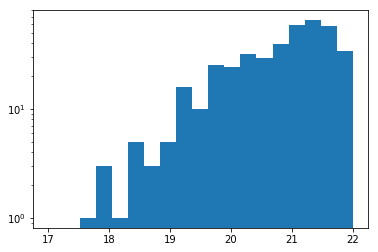

In [6]:
_ = hist(qsos['obsMag'][:,1],linspace(17,22,20),log=True)

color-color diagram from __observed__ magnitudes, including errors:

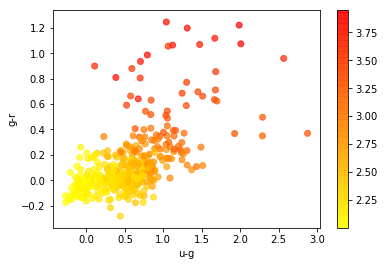

In [7]:
scatter(qsos['obsMag'][:,0]-qsos['obsMag'][:,1],qsos['obsMag'][:,1]-qsos['obsMag'][:,2],
        c=qsos['z'],cmap=cm.autumn_r,alpha=0.7)
colorbar()
xlabel('u-g')
ylabel('g-r')

the list of emission lines in the model:

In [8]:
qsodatahdr = fits.getheader('boss_dr9qlf_sim.fits',1)
for i,n in enumerate(qsodatahdr['LINENAME'].split(',')):
    print '%d:%s, '% (i,n,),
print

0:LyB,  1:ArI,  2:FeIII:UV1,  3:CIII*,  4:LyAn,  5:LyAb,  6:NV,  7:SiII,  8:OI,  9:CII,  10:SiIV+OIV],  11:L1480,  12:CIVn,  13:CIVb,  14:HeII,  15:OIII],  16:L1690,  17:NIII],  18:SiII_1818,  19:AlIII,  20:SiIII],  21:CIII]b,  22:CIII]n,  23:fe2120,  24:fe2220,  25:MgIIb,  26:MgIIn,  27:OIII_3133,  28:[NeV]3346,  29:[NeV]3426,  30:[OII]3728,  31:[NeIII]3869,  32:HeI3889,  33:[NeIII]3968,  34:Hd,  35:Hg,  36:[OIII]4364,  37:Hbeta,  38:[OIII]4960,  39:[OIII]5008,  40:HeI_5877,  41:[OI]6302,  42:[OI]6365,  43:[NII]6549,  44:[NII]6585,  45:HAb,  46:HAn,  47:[SII]6718,  48:[SII]6732,  49:HeI7067,  50:[OII]7321,  51:OI8446,  52:[SIII]9069,  53:FeII9202,  54:Pae,  55:Pad,  56:HeI10830,  57:Pag,  58:OI11287,  59:Pabeta,  60:Paalpha,  61:HeI20580, 


broad CIV equivalent width, displaying the Baldwin Effect:

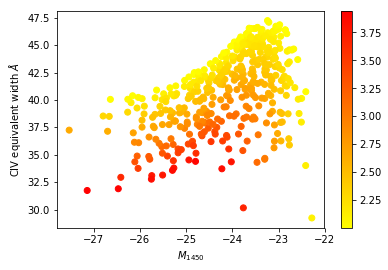

In [9]:
scatter(qsos['absMag'],qsos['emLines'][:,13,1],c=qsos['z'],cmap=cm.autumn_r)
colorbar()
xlabel("$M_{1450}$")
ylabel("CIV equivalent width $\AA$")

### Example spectra

for this example the wavelength cutoff is 30 micron, but the model doesn't include warm dust and thus is invalid beyond a few micron.

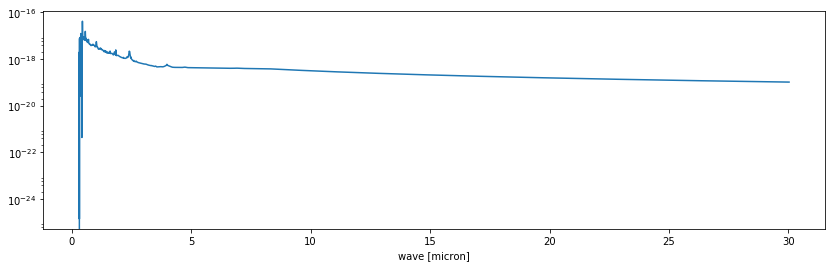

In [10]:
figure(figsize=(14,4))
plot(wave/1e4,qsos['spec'][0])
yscale('log')
xlabel('wave [micron]')

zoom in on the lyman alpha - CIV region:

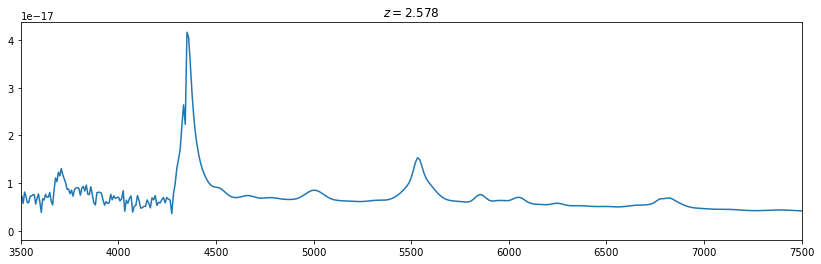

In [11]:
figure(figsize=(14,4))
plot(wave,qsos['spec'][20])
xlim(3500,7500)
title('$z=%.3f$'%qsos['z'][20])

### IGM absorption model (`simqso.hiforest`)

an example of the forest transmission spectra at R=30,000 (the native resolution for the monte carlo forest spectra):

In [13]:
np.random.seed(12345)
wave = buildWaveGrid(dict(waveRange=(3500,4800),SpecDispersion=30000))
forest = hiforest.IGMTransmissionGrid(wave,WP11_model,1)
T = forest.next_spec(0,2.9)

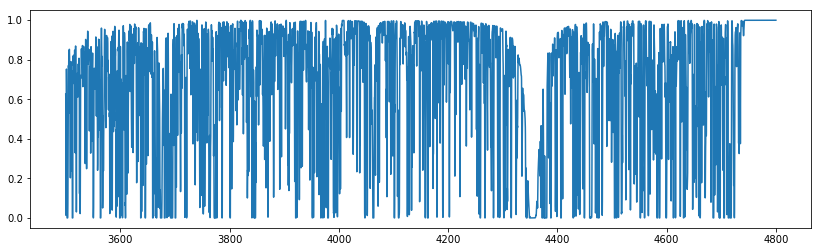

In [14]:
figure(figsize=(14,4))
plot(wave,T)

(4300, 4800)

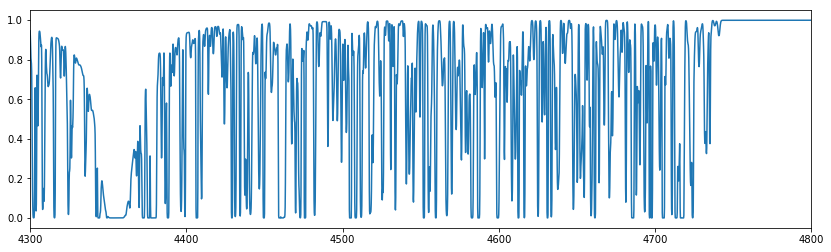

In [15]:
figure(figsize=(14,4))
plot(wave,T)
xlim(4300,4800)